In [10]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\thiag\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Importando libs

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Tabelas de pertencimento dos Precedentes

C:\Users\thiag\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\thiag\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


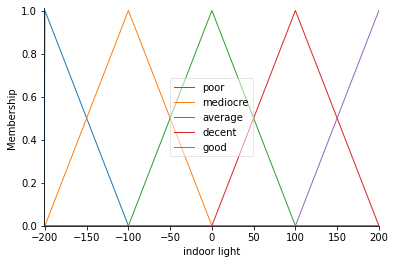

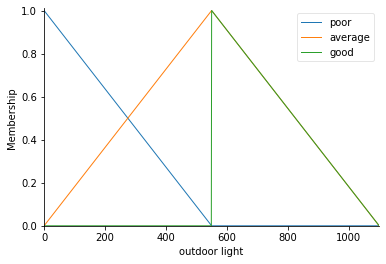

In [12]:
indoor = ctrl.Antecedent(np.arange(-201, 201, 1), 'indoor light')
outdoor = ctrl.Antecedent(np.arange(0, 1100, 1), 'outdoor light')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API

#A - Iluminação interior
indoor['poor']=fuzz.trimf(indoor.universe,[-200,-200,-100])
indoor['mediocre']=fuzz.trimf(indoor.universe,[-200,-100,0])
indoor['average']=fuzz.trimf(indoor.universe,[-100,0,100])
indoor['decent']=fuzz.trimf(indoor.universe,[0,100,200])
indoor['good']=fuzz.trimf(indoor.universe,[100,200,200])

#B - Iluminação exterior
outdoor['poor']=fuzz.trimf(outdoor.universe,[0,0,550])
outdoor['average']=fuzz.trimf(outdoor.universe,[0,550,1100])
outdoor['good']=fuzz.trimf(outdoor.universe,[550,550,1100])

# You can see how these look with .view()
indoor.view()
outdoor.view()

## Tabela de pertencimento dos consequentes:

C:\Users\thiag\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


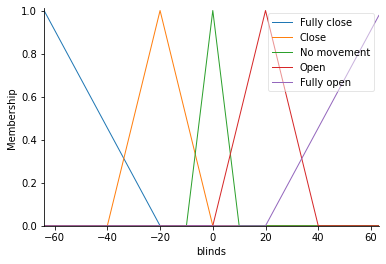

In [13]:
#C - Persianas

blinds =ctrl.Consequent(np.arange(-64, 64, 1), 'blinds')

blinds['Fully close']=fuzz.trimf(blinds.universe,[-64,-64,-20])
blinds['Close']=fuzz.trimf(blinds.universe,[-40,-20,0])
blinds['No movement']=fuzz.trimf(blinds.universe,[-10,0,10])
blinds['Open']=fuzz.trimf(blinds.universe,[0,20,40])
blinds['Fully open']=fuzz.trimf(blinds.universe,[20,64,64])

blinds.view()

C:\Users\thiag\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


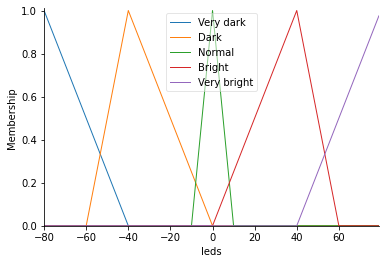

In [14]:
#D - Lampadas
leds = ctrl.Consequent(np.arange(-80,80,1),"leds")

leds["Very dark"] = fuzz.trimf(leds.universe, [-80,-80 ,-40 ])
leds["Dark"] = fuzz.trimf(leds.universe, [-60,-40 ,0 ])
leds["Normal"] = fuzz.trimf(leds.universe, [-10,-0 ,10 ])
leds["Bright"] = fuzz.trimf(leds.universe, [0,40 ,60 ])
leds["Very bright"] = fuzz.trimf(leds.universe, [40, 80, 80])


leds.view()

## Criando as Regras

In [15]:
#Tabelas de regras: Lâmpadas

regral1=ctrl.Rule(indoor['poor']&outdoor['poor'],leds['Very bright'])
regral2=ctrl.Rule(indoor['poor']&outdoor['average'],leds['Very bright'])
regral3=ctrl.Rule(indoor['poor']&outdoor['good'],leds['Bright'])
regral4=ctrl.Rule(indoor['mediocre']&outdoor['poor'],leds['Very bright'])
regral5=ctrl.Rule(indoor['mediocre']&outdoor['average'],leds['Bright'])
regral6=ctrl.Rule(indoor['mediocre']&outdoor['good'],leds['Bright'])
regral7=ctrl.Rule(indoor['average'],leds['Normal'])
regral8=ctrl.Rule(indoor['decent']&outdoor['poor'],leds['Normal'])
regral9=ctrl.Rule(indoor['decent']&outdoor['average'],leds['Dark'])
regral10=ctrl.Rule(indoor['decent']&outdoor['good'],leds['Very dark'])
regral11=ctrl.Rule(indoor['good']&outdoor['poor'],leds['Dark'])
regral12=ctrl.Rule(indoor['good']&outdoor['average'],leds['Very dark'])
regral13=ctrl.Rule(indoor['good']&outdoor['good'],leds['Very dark'])

In [16]:
leds_ctrl = ctrl.ControlSystem([
    regral1, regral2, regral3,regral4,
    regral5,regral6,regral7,regral8,
    regral9,regral10,regral11,regral12,regral13])

led = ctrl.ControlSystemSimulation(leds_ctrl)

## Testando as regras de pertinência para as lâmpadas

Teste 1 - Led: 47.36%


C:\Users\thiag\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


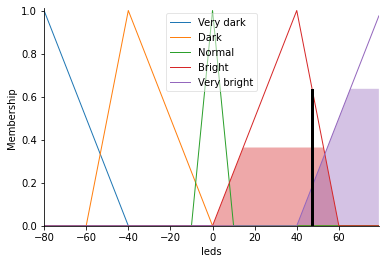

In [17]:
# Teste 1
led.input['indoor light'] = -100
led.input['outdoor light']=200
led.compute()
print (f"Teste 1 - Led: {led.output['leds']:.2f}%")
leds.view(sim=led)

C:\Users\thiag\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Teste 2 - Led: 33.53%


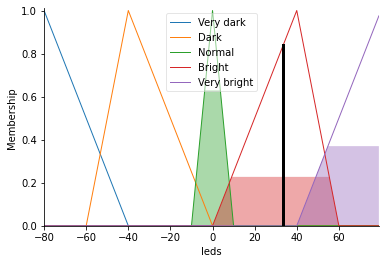

In [18]:
# Teste 2
led.input['indoor light'] = -37
led.input['outdoor light']=125
led.compute()
print (f"Teste 2 - Led: {led.output['leds']:.2f}%")
leds.view(sim=led)